<a href="https://colab.research.google.com/github/Aranya77/Lab8/blob/main/TF_IDF_6504101411_%E0%B8%AD%E0%B8%A3%E0%B8%B1%E0%B8%8D%E0%B8%A2%E0%B8%B2%20%E0%B8%AA%E0%B8%B1%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%81%E0%B8%B2%E0%B8%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# นำเข้า hf_hub_download จากไลบรารี huggingface_hub สำหรับดาวน์โหลดไฟล์จาก Hugging Face Model Hub
from huggingface_hub import hf_hub_download

# นำเข้าไลบรารี nltk สำหรับการประมวลผลภาษาธรรมชาติ
import nltk
# ดาวน์โหลดข้อมูลชุด punkt สำหรับการแยกคำ (tokenization) จาก nltk
nltk.download('punkt')

# นำเข้า function word_tokenize จาก nltk.tokenize สำหรับการแยกคำจากข้อความ
from nltk.tokenize import word_tokenize

# นำเข้าไลบรารี pandas สำหรับการจัดการข้อมูลในรูปแบบ DataFrame
import pandas as pd

# นำเข้า plotly.express สำหรับการสร้างกราฟและแสดงผลข้อมูล
import plotly.express as px

# นำเข้า Counter จาก collections เพื่อใช้ในการนับความถี่ของคำ
from collections import Counter

# นำเข้า re สำหรับการทำงานกับ Regular Expressions (การจับคู่ข้อความ)
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ในการดาวน์โหลดชุดข้อมูลบทความจาก Medium จาก Hugging Face Hub และแปลงข้อมูลเป็น pandas DataFrame คุณสามารถทำตามขั้นตอนเหล่านี้:

In [ ]:
# ดาวน์โหลดชุดข้อมูลของบทความจาก Medium จาก Hugging Face Dataset
# สามารถดาวน์โหลดได้จากลิงค์นี้ https://huggingface.co/datasets/fabiochiu/medium-articles
df_articles = pd.read_csv(
  # ใช้ hf_hub_download เพื่อดาวน์โหลดไฟล์ CSV จาก Hugging Face
  hf_hub_download("fabiochiu/medium-articles", repo_type="dataset", filename="medium_articles.csv")
)

# มีบทความทั้งหมด 192,368 บทความ แต่เราจะสุ่มเลือกแค่ 30,000 บทความ
# เพื่อให้การคำนวณเร็วขึ้น
df_articles = df_articles.sample(n=30000)

# แสดงข้อมูล 5 แถวแรกจาก DataFrame df_articles
df_articles.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


medium_articles.csv:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

,title,text,url,authors,timestamp,tags
8458,Big Data with R !!,"Every now and then, we always face and hear th...",https://medium.com/analytics-vidhya/big-data-w...,['Apoorva Jain'],2020-07-06 16:48:18.559000+00:00,"['Data Science', 'Parallel Computing', 'Rstudi..."
7698,Letters.,why do i feel like i don’t own you?\n\nyour wo...,https://medium.com/poets-unlimited/letters-897...,[],2019-06-18 13:42:21.096000+00:00,"['Poetry', 'Writing']"
98216,ABAP With Choropleth Maps,"“If you can’t explain it simply, you don’t und...",https://medium.com/@inogalwargan/abap-with-cho...,['Agustinus Mariano Galwargan'],2020-12-22 07:33:54.219000+00:00,"['Leaflet', 'Programming', 'Abap', 'Maps', 'Ja..."
57777,Making Political Science a Science,Making Political Science a Science\n\nWhy poli...,https://medium.com/carre4/making-political-sci...,['Weber Wong'],2020-12-25 20:28:33.721000+00:00,"['Machine Learning', 'Science', 'History', 'Po..."
74236,"How an Unfunny, Unfocused and Non-First Rate S...","How an Unfunny, Unfocused and Non-First Rate S...",https://medium.com/inspired-writer/how-an-unfu...,['Michael Burg'],2021-02-03 14:40:21.333000+00:00,"['Writing Life', 'Writers On Writing', 'Advice..."


**คำอธิบาย:**
1. **ดาวน์โหลดชุดข้อมูล:** โค้ดนี้ใช้ฟังก์ชัน hf_hub_download จากไลบรารี huggingface_hub เพื่อดาวน์โหลดชุดข้อมูลที่มีชื่อว่า "medium-articles.csv" จาก Hugging Face โดยใช้ชื่อ fabiochiu/medium-articles ซึ่งเป็นที่เก็บข้อมูลบน Hugging Face.

2. **สุ่มข้อมูล:**  เนื่องจากในชุดข้อมูลมีบทความทั้งหมด 192,368 บทความ โค้ดนี้เลือกสุ่มแค่ 30,000 บทความ เพื่อช่วยให้การคำนวณและการประมวลผลข้อมูลเร็วขึ้นและไม่ใช้ทรัพยากรมากเกินไป.

3. **แสดงข้อมูล 5 แถวแรก:** ใช้ df_articles.head() เพื่อแสดงแถวแรกๆ ของ DataFrame ซึ่งจะช่วยให้เห็นข้อมูลตัวอย่างจากชุดข้อมูลได้ง่ายขึ้น.

การทำการเตรียมข้อมูลข้อความ (text preprocessing) อย่างง่ายและนับจำนวนการเกิดของแต่ละคำ (token) ในชุดข้อมูลทั้งหมดสามารถทำได้ตามขั้นตอนเหล่านี้:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**คำอธิบาย:**
1. **การนำเข้า nltk:** โค้ดนี้นำเข้าไลบรารี nltk ซึ่งเป็นเครื่องมือที่ใช้ในการประมวลผลภาษาธรรมชาติ (Natural Language Processing - NLP) ที่มีฟังก์ชันต่างๆ เช่น การแยกคำ (tokenization), การตัดคำ, การวิเคราะห์ข้อความ, เป็นต้น.

2. **ดาวน์โหลด punkt:** punkt เป็นชุดข้อมูลที่ใช้ในการแยกคำ (tokenization) โดยไม่ต้องใช้การฝึกสอนโมเดลเพิ่มเติม ชุดข้อมูลนี้ช่วยในการแยกคำจากข้อความในหลายภาษา เช่น ภาษาอังกฤษ, ภาษาเยอรมัน และภาษาอื่นๆ.

3. **ดาวน์โหลด punkt_tab:** punkt_tab เป็นชุดข้อมูลเสริมที่ช่วยให้การแยกคำมีความถูกต้องมากขึ้นในบางกรณีที่อาจมีข้อผิดพลาด ซึ่งการดาวน์โหลดทั้งสองชุดนี้จะช่วยให้มั่นใจว่าโค้ดสามารถแยกคำได้อย่างมีประสิทธิภาพและหลีกเลี่ยงข้อผิดพลาดที่อาจเกิดขึ้นได้.

In [ ]:
# กำหนดฟังก์ชัน from_text_to_counter ที่รับข้อความและแปลงเป็นตัวนับคำ
def from_text_to_counter(full_text):
    # แปลงข้อความทั้งหมดเป็นตัวพิมพ์เล็ก เพื่อให้การนับคำไม่สนใจเรื่องตัวพิมพ์ใหญ่หรือเล็ก
    full_text_lower = full_text.lower()

    # ลบเครื่องหมายพิเศษทั้งหมดจากข้อความ เช่น , . ! ? หรือเครื่องหมายอื่นๆ เพื่อไม่ให้มีผลกับการนับคำ
    full_text_no_punctuation = re.sub(r'[^\w\s]', ' ', full_text_lower)

    # แยกคำในข้อความ โดยใช้ word_tokenize จาก NLTK เพื่อแยกคำตามที่กำหนด
    full_text_tokenized = word_tokenize(full_text_no_punctuation)

    # นับการเกิดของแต่ละคำ โดยใช้ Counter จาก collections
    token_counter = Counter(full_text_tokenized)

    # คืนค่าผลลัพธ์เป็นตัวนับคำ (Counter)
    return token_counter

# นำข้อมูลจากคอลัมน์ 'text' ของ DataFrame มารวมเป็นข้อความเดียว
# โดยการใช้ " ".join เพื่อรวมค่าของคอลัมน์ 'text' ทั้งหมดเป็นข้อความเดียว
full_text = " ".join(df_articles["text"].values)

# เรียกใช้ฟังก์ชันจากข้างต้นเพื่อให้ทำการนับจำนวนคำในข้อความทั้งหมด
token_counter = from_text_to_counter(full_text)

# แสดงผลคำที่พบมากที่สุด 10 คำในข้อความ
# ใช้ most_common(10) เพื่อแสดง 10 คำที่มีความถี่สูงสุด
print(token_counter.most_common(10))

[('the', 1253486), ('to', 784875), ('and', 685255), ('of', 600728), ('a', 582685), ('in', 419735), ('is', 336595), ('that', 315740), ('you', 289823), ('i', 284584)]


**คำอธิบาย:**
1. ฟังก์ชัน from_text_to_counter:
ฟังก์ชันนี้รับข้อความ (string) เป็นพารามิเตอร์ และทำการประมวลผลข้อความดังนี้:
- แปลงข้อความเป็นตัวพิมพ์เล็ก: เพื่อให้การนับคำไม่สนใจเรื่องตัวพิมพ์ใหญ่หรือตัวพิมพ์เล็ก
- ลบเครื่องหมายพิเศษ: ใช้ re.sub เพื่อแทนที่เครื่องหมายพิเศษทั้งหมด (เช่น จุด, คอมมา) ด้วยช่องว่าง ซึ่งจะทำให้ข้อความสะอาดขึ้นและไม่เกิดการนับคำผิด
- แยกคำ: ใช้ word_tokenize จาก NLTK เพื่อแยกข้อความเป็นคำๆ (tokens)
- นับคำ: ใช้ Counter จาก collections เพื่อสร้างตัวนับคำที่นับจำนวนการเกิดของแต่ละคำในข้อความ
2. การรวมข้อความ:
- โค้ดนี้ใช้ join เพื่อรวมค่าทั้งหมดจากคอลัมน์ 'text' ใน DataFrame df_articles เป็นข้อความเดียว โดยแต่ละข้อความในคอลัมน์จะถูกเชื่อมด้วยช่องว่าง
3. การนับคำ:
- หลังจากที่ได้ข้อความที่รวมทั้งหมดแล้ว ฟังก์ชัน from_text_to_counter จะทำการนับคำในข้อความนั้น โดยใช้ตัวนับคำ token_counter ซึ่งจะเก็บคำและจำนวนที่พบ
แสดงคำที่พบมากที่สุด:

4. ใช้ most_common(10) จาก Counter เพื่อแสดง 10 คำที่มีความถี่สูงสุดจากข้อความทั้งหมด

In [ ]:
top_n = 30
xs, ys = list(zip(*token_counter.most_common(top_n)))

plot_title = "Tokens and their occurrencies on the Medium dataset"
labels = {
  "x": "Tokens",
  "y": "Number of occurrencies"
}
fig = px.bar(x=xs, y=ys, template="plotly_dark", title=plot_title, labels=labels)
fig.show()

**ตามที่คาดไว้**

- คำที่พบมากที่สุดในชุดข้อมูลจะเป็นคำประเภท คำบุพบท (prepositions) และ คำสรรพนาม (articles) เช่น "the", "to", และ "and"
- ต่อไปเราจะตรวจสอบว่า การเกิดของคำเหล่านี้ มีความสัมพันธ์แบบ อัตราส่วนผกผัน (inverse proportionality) กับ อันดับ ของคำหรือไม่ ซึ่งตามหลัก Zipf's Law, คำที่พบมากที่สุดจะมีอันดับที่ต่ำ (1st rank) และคำที่พบได้น้อยจะมีอันดับสูง (rank ที่สูงกว่า).

In [ ]:
top_n = 30
xs, ys = list(zip(*token_counter.most_common(top_n)))

ys_zipfs = [ys[0]]
for i in range(1, len(ys)):
  new_value = (ys_zipfs[0] / (i + 1))
  ys_zipfs.append(new_value)

plot_title = "Tokens and their occurrencies on the Medium dataset (red) VS Zipf's law (blue)"
labels = {
  "x": "Tokens",
  "y": "Number of occurrencies"
}
fig = px.line(x=xs, y=ys_zipfs, template="plotly_dark", title=plot_title, labels=labels)
fig.add_bar(x=xs, y=ys)
fig.update_layout(showlegend=False)
fig.show()

**ถ้าคุณสังเกตเห็น**
- ความแตกต่างระหว่างค่าที่ทำนายโดย Zipf's Law และจำนวนการเกิดของคำใน Medium dataset อาจเป็นเพราะว่า บทความใน Medium อาจไม่สะท้อนการใช้ภาษาที่เป็นมาตรฐานของภาษาอังกฤษทั่วไป เหมือนใน Brown Corpus ซึ่งเป็นชุดข้อมูลมาตรฐานที่ใช้ในการวิจัยด้านภาษาศาสตร์

**วิธีการทดสอบ Zipf's Law ใน Brown Corpus:**

- ตอนนี้เราจะลองทดสอบ Zipf's Law กับข้อความใน Brown Corpus ที่มีอยู่ใน nltk
- ซึ่งเป็นชุดข้อมูลที่มีการใช้ภาษาที่เป็นธรรมชาติมากขึ้น และอาจสะท้อนการกระจายคำที่ใกล้เคียงกับการทำนายของ Zipf's Law มากขึ้น

In [ ]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
# รับรายชื่อไฟล์ทั้งหมดในชุดข้อมูล 'gutenberg' จาก NLTK
file_ids = nltk.corpus.gutenberg.fileids()

# สร้างลิสต์ของข้อความทั้งหมดจากแต่ละไฟล์ในชุดข้อมูล Gutenberg
# ใช้ nltk.corpus.gutenberg.words() เพื่อดึงคำทั้งหมดจากไฟล์ที่เลือก
corpora = [
    " ".join(nltk.corpus.gutenberg.words(corpus_name))  # รวมคำทั้งหมดในไฟล์เป็นข้อความเดียว
    for corpus_name in file_ids  # ทำงานกับแต่ละไฟล์ในชุดข้อมูล Gutenberg
]

# เชื่อมโยงข้อความทั้งหมดจากแต่ละไฟล์เข้าด้วยกันเป็นข้อความเดียว
full_text = " ".join(corpora)

# นับจำนวนการเกิดของแต่ละคำในข้อความทั้งหมด
token_counter = from_text_to_counter(full_text)

หากคุณต้องการดาวน์โหลด ทุกๆ Corpus จาก nltk และทำการนับจำนวนการเกิดของแต่ละคำในชุดข้อมูลทั้งหมด คุณสามารถทำตามขั้นตอนเหล่านี้ได้:

In [ ]:
# รับรายชื่อไฟล์ทั้งหมดในชุดข้อมูล 'gutenberg' จาก NLTK
file_ids = nltk.corpus.gutenberg.fileids()

# สร้างลิสต์ของข้อความทั้งหมดจากแต่ละไฟล์ในชุดข้อมูล Gutenberg
# ใช้ nltk.corpus.gutenberg.words() เพื่อดึงคำทั้งหมดจากไฟล์ที่เลือก
corpora = [
    " ".join(nltk.corpus.gutenberg.words(corpus_name))  # รวมคำทั้งหมดในไฟล์เป็นข้อความเดียว
    for corpus_name in file_ids  # ทำงานกับแต่ละไฟล์ในชุดข้อมูล Gutenberg
]

# เชื่อมโยงข้อความทั้งหมดจากแต่ละไฟล์เข้าด้วยกันเป็นข้อความเดียว
full_text = " ".join(corpora)

# นับจำนวนการเกิดของแต่ละคำในข้อความทั้งหมด
token_counter = from_text_to_counter(full_text)

หากคุณต้องการที่จะ plot จำนวนการเกิดของคำที่พบมากที่สุดในชุดข้อมูลที่เราได้ทำการนับคำไว้แล้ว (เช่น ในกรณีนี้เราใช้ nltk corpora), เราสามารถเลือกคำที่มีความถี่สูงสุดและแสดงกราฟความถี่เหล่านั้นได้.

In [ ]:
# นับจำนวนการเกิดของคำ 30 อันดับแรก
top_n = 30
xs, ys = list(zip(*token_counter.most_common(top_n)))

# คำนวณค่า Zipf ของการเกิดคำใน 30 อันดับแรก
ys_zipfs = [ys[0]]  # เริ่มต้นด้วยค่าการเกิดคำที่มากที่สุด (อันดับแรก)
for i in range(1, len(ys)):
  # คำนวณค่า Zipf โดยใช้สูตร: f(i) = f(1) / (i + 1)
  new_value = (ys_zipfs[0] / (i + 1))
  ys_zipfs.append(new_value)  # เพิ่มค่าคำนวณที่ได้ไปยังลิสต์

# แสดงผลกราฟ
plot_title = "Tokens and their occurrencies on the Brown corpora (red) VS Zipf's law (blue)"
labels = {
  "x": "Tokens",  # แท็กแกน X: ชื่อของคำ (tokens)
  "y": "Number of occurrencies"  # แท็กแกน Y: จำนวนการเกิดของคำ
}

# สร้างกราฟเส้น (line plot) แสดงค่า Zipf (สีน้ำเงิน) และการเกิดคำจริง (สีแดง)
fig = px.line(x=xs, y=ys_zipfs, template="plotly_dark", title=plot_title, labels=labels)
fig.add_bar(x=xs, y=ys)  # เพิ่มกราฟแท่ง (bar chart) เพื่อแสดงการเกิดคำจริง
fig.update_layout(showlegend=False)  # ปิดการแสดงคำอธิบายกราฟ (legend)
fig.show()  # แสดงกราฟ

- ตามที่เราสังเกตเห็นจากกราฟที่แสดงการกระจายของคำใน Zipf’s Law ความถี่ของคำในชุดข้อมูลต่างๆ เช่น NLTK corpora จะมีลักษณะที่คล้ายคลึงกับที่ Zipf’s Law คาดการณ์ไว้ กล่าวคือ คำที่มีความถี่สูงที่สุดจะอยู่ในอันดับที่ต่ำที่สุด และคำที่มีความถี่ต่ำที่สุดจะอยู่ในอันดับที่สูงขึ้น

**Zipf’s Law และ Stopwords**
- Zipf’s Law ให้ความเข้าใจว่า การกระจายของคำ ในข้อความมักจะมีลักษณะตาม กฎพลัง หรือ Power Law กล่าวคือ:

- คำที่พบบ่อยที่สุด (เช่น "the", "of", "and", "to", "in") มักจะเป็นคำที่ไม่ใช่สาระสำคัญในประโยค (หรือ stopwords) ซึ่งจะมีการพบบ่อยในทุกข้อความ
- คำที่พบได้ไม่บ่อย มักจะมีความหมายเฉพาะและเกี่ยวข้องกับเนื้อหาหลักของข้อความ

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
english_stopwords = stopwords.words('english')
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- ถ้าเราใช้วิธีการในการคำนวณน้ำหนักของแต่ละคำ (token) โดยการตั้งน้ำหนักที่มีค่าตรงข้ามกับความถี่ของมันในข้อความ (inverse frequency) ในตัวอย่างการสร้าง search engine หรือ ระบบการค้นหาข้อมูล แนวคิดนี้จะคล้ายคลึงกับ Zipf's Law ซึ่งกล่าวว่า คำที่เกิดขึ้นไม่บ่อยในข้อความมักจะมีความสำคัญมากกว่า คำที่เกิดบ่อย เช่น stopwords ที่ไม่มีความหมายเฉพาะเจาะจง

**หลักการเบื้องหลัง**
- คำที่หายาก (Rare Words): คำที่ปรากฏไม่บ่อยในข้อความมักจะมีความหมายที่เฉพาะเจาะจงและสามารถช่วยแยกแยะเอกสารได้ดีกว่า
- คำที่พบได้บ่อย (Common Words): คำที่พบได้บ่อย (เช่น "the", "and", "to") มักจะไม่ช่วยแยกแยะเอกสารและมักจะถูกตัดออกจากการคำนวณ

In [ ]:
token_counter = Counter({token: count for token, count in token_counter.items() if token not in english_stopwords})

print(token_counter.most_common(10))

[('shall', 11682), ('said', 9429), ('unto', 9010), ('lord', 8590), ('thou', 6759), ('one', 6218), ('man', 5615), ('thy', 5609), ('god', 5287), ('thee', 4807)]


In [ ]:
# นับจำนวนการเกิดของคำ 30 อันดับแรก
top_n = 30
xs, ys = list(zip(*token_counter.most_common(top_n)))

# คำนวณค่า Zipf ของการเกิดคำใน 30 อันดับแรก
ys_zipfs = [ys[0]]
for i in range(1, len(ys)):
  new_value = (ys_zipfs[0] / (i + 1))
  ys_zipfs.append(new_value)

# แสดงผลกราฟ
plot_title = "Tokens and their occurrencies on the Brown corpora (red) VS Zipf's law (blue)"
labels = {
  "x": "Tokens",
  "y": "Number of occurrencies"
}
fig = px.line(x=xs, y=ys_zipfs, template="plotly_dark", title=plot_title, labels=labels)
fig.add_bar(x=xs, y=ys)
fig.update_layout(showlegend=False)
fig.show()

**TF-IDF (Term Frequency-Inverse Document Frequency)**

- TF-IDF คือ เทคนิคที่ใช้ในการวัดความสำคัญของคำในเอกสารที่มีในชุดข้อมูล (corpus) โดยการให้คะแนนหรือการวัดความเกี่ยวข้องของคำกับเอกสารนั้น ๆ โดยจะคำนึงถึงทั้ง ความถี่ของคำในเอกสาร (Term Frequency, TF) และ ความถี่ของคำในชุดข้อมูล (Inverse Document Frequency, IDF)

**การคำนวณ TF-IDF**
- การคำนวณ TF-IDF ทำได้โดยการคูณสองค่าคือ Term Frequency (TF) และ Inverse Document Frequency (IDF):


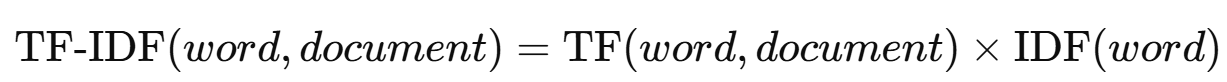

1. Term Frequency (TF): วัดความถี่ของคำในเอกสารว่า คำนั้น ๆ ปรากฏกี่ครั้งในเอกสาร

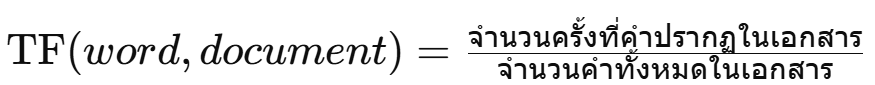

- ค่าของ TF จะมากขึ้นเมื่อคำปรากฏบ่อยในเอกสารนั้น ๆ

2. Inverse Document Frequency (IDF): วัดความสำคัญของคำในชุดข้อมูลทั้งหมด

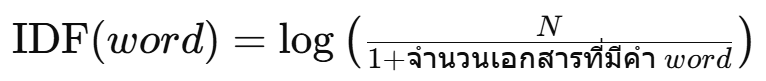

- N คือจำนวนเอกสารทั้งหมดในชุดข้อมูล
- จำนวนเอกสารที่มีคำ Word คือจำนวนเอกสารที่คำ Word ที่ปรากฏ
- ค่าของ IDF จะสูงเมื่อคำปรากฏในเอกสารน้อย และจะต่ำเมื่อคำปรากฏในหลาย ๆ เอกสาร

**หลักการทำงานของ TF-IDF**
- TF (Term Frequency) จะให้ความสำคัญกับคำที่ปรากฏบ่อยในเอกสาร ซึ่งช่วยบ่งชี้ว่าเป็นคำที่สำคัญสำหรับเอกสารนั้น ๆ
- IDF (Inverse Document Frequency) จะให้ความสำคัญกับคำที่พบในเอกสารน้อย ซึ่งช่วยบ่งชี้ว่าคำนั้นมีความเฉพาะเจาะจงและสามารถใช้แยกแยะเอกสารได้ดี
- คำที่มี TF สูงและ IDF ต่ำจะเป็นคำที่ไม่ค่อยมีความเฉพาะเจาะจงและมักเป็น stopwords เช่น "the", "and", "to" ในขณะที่คำที่มี TF สูงและ IDF สูงจะเป็นคำที่เฉพาะเจาะจงและมีความสำคัญมากกว่า

**TF-IDF Example**
- เราจะใช้ตัวอย่างเพื่อคำนวณ TF-IDF สำหรับคำในชุดเอกสาร โดยมีชุดข้อมูลดังนี้:

**Query (Q): "The cat."**

Documents:
- D1: "The cat is on the mat."
- D2: "My dog and cat are the best."
- D3: "The locals are playing."

**การคำนวณ TF (Term Frequency)**
- TF (Term Frequency) คือการคำนวณความถี่ของคำในเอกสาร โดยใช้สูตร:

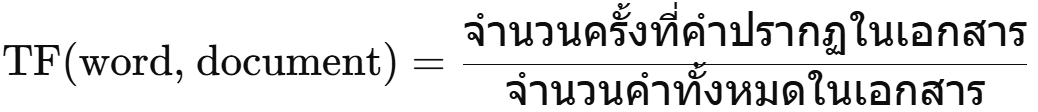

คำนวณ TF สำหรับคำ "the" และ "cat"

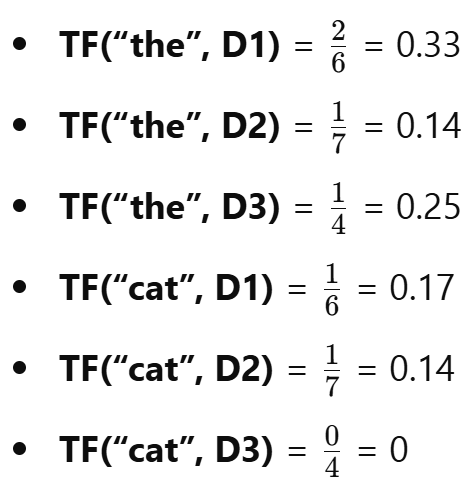

**การคำนวณ IDF (Inverse Document Frequency)**
- IDF (Inverse Document Frequency) คือการคำนวณความสำคัญของคำในชุดเอกสารทั้งหมด โดยใช้สูตร:

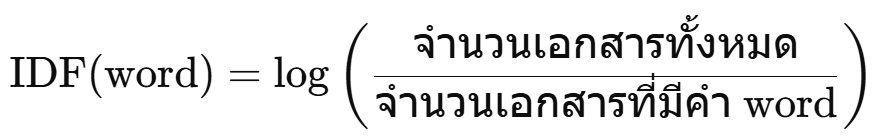

คำนวณ IDF สำหรับคำ "the" และ "cat"

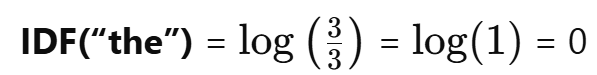

คำ "the" ปรากฏในทุกเอกสาร ดังนั้น IDF ของคำนี้จะเป็น 0

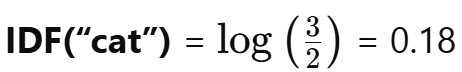

คำ "cat" ปรากฏใน 2 เอกสารจากทั้งหมด 3 เอกสาร ดังนั้น IDF ของคำนี้จะเป็น 0.18

**การคำนวณ TF-IDF**
- TF-IDF คือการคูณ TF และ IDF เพื่อให้คำที่มีความสำคัญมากในเอกสารและหายากในชุดข้อมูลได้คะแนนสูง:

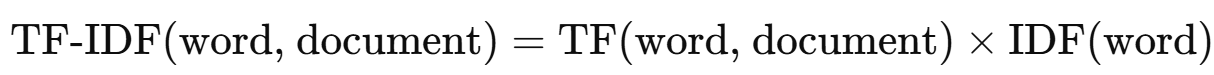

คำนวณ TF-IDF สำหรับคำ "the" และ "cat"

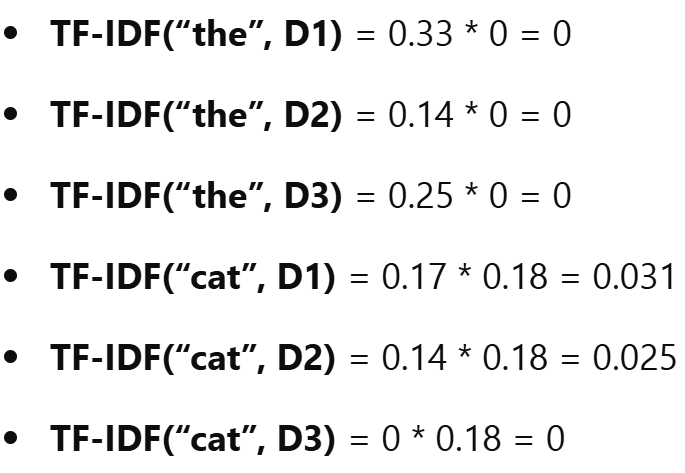

**TF-IDF Ranking Function**
- ขั้นตอนถัดไปในการใช้ TF-IDF คือการใช้ฟังก์ชันจัดอันดับ (ranking function) เพื่อจัดเรียงเอกสารตามคะแนน TF-IDF ของคำต่าง ๆ ในเอกสารนั้น ๆ โดยการคำนวณ average TF-IDF score ของคำในเอกสารแต่ละชุด
- เราสามารถใช้คะแนน TF-IDF ของคำในคำค้น (query) เพื่อลำดับเอกสาร D1, D2, และ D3 ที่สัมพันธ์กับคำค้น Q ("The cat").

**การคำนวณค่าเฉลี่ยของ TF-IDF ในเอกสาร**
- เอกสาร D1:

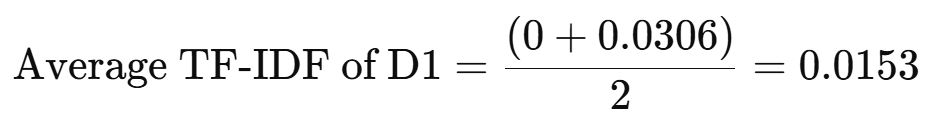

- เอกสาร D2:

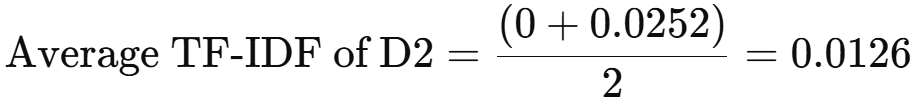

- เอกสาร D3:

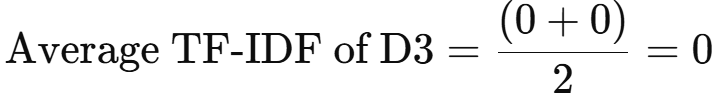

**การวิเคราะห์ผลลัพธ์**
- จากการคำนวณ TF-IDF ของแต่ละคำในเอกสาร พบว่า:

- คำ "the" มี IDF เท่ากับ 0 เนื่องจากปรากฏในทุกเอกสารในชุดข้อมูล ทำให้ TF-IDF ของคำนี้ไม่มีผลต่อการจัดอันดับ
คำ "cat" ซึ่งมี IDF เท่ากับ 0.18 มีส่วนช่วยในการคำนวณ TF-IDF ให้กับเอกสารที่มีคำนี้

**การจัดอันดับเอกสาร**

เมื่อใช้คะแนน average TF-IDF เพื่อจัดอันดับเอกสารตามคำค้น "The cat" (Q), ผลลัพธ์ที่ได้คือ:

- D1: The cat is on the mat. (คะแนนสูงสุด: 0.0153)
- D2: My dog and cat are the best. (คะแนน: 0.0126)
- D3: The locals are playing. (คะแนน: 0)